In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_excel('/home/srgrace/Downloads/zomato_train.xlsx', header= 0,
                        encoding= 'unicode_escape')

In [3]:
print(df.shape)
test_df = df[~df['rates'].notnull()]
test_df = test_df.reset_index(drop=True)
df = df[df['rates'].notnull()]
df = df.reset_index(drop=True)
print(test_df.shape)
print(df.shape)
test_df.head()

(41373, 17)
(7981, 17)
(33392, 17)


,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/shrawan-resta...,"9, Prashanti Shopping Center, Channasandra, Ka...",Shrawan Restaurant,Yes,No,0,+91 6361957990,Whitefield,Quick Bites,NaN,"North Indian, Chinese",300,[],"['Veg Fried Rice', 'Veg Thali', 'Paneer Butter...",Dine-out,Whitefield,NaN
1,https://www.zomato.com/bangalore/copacabana-pu...,"18/1, Cambridge Road, Cambridge Layout, Ulsoor...",Copacabana Pub,No,No,0,+91 9739560520\n\n080 25363694,Ulsoor,"Pub, Casual Dining",NaN,"Mexican, North Indian, Continental","1,500",[],[],Dine-out,Brigade Road,NaN
2,https://www.zomato.com/bangalore/fixmynutritio...,"36, Richmond Road, Bangalore",FixMyNutrition,No,No,0,+91 9986997919,Richmond Road,"Takeaway, Delivery",NaN,"Salad, Asian, Continental, Healthy Food",500,[],[],Desserts,Lavelle Road,NaN
3,https://www.zomato.com/bangalore/santos-marath...,"Ground Floor, Food Court, Embassy Tech Square,...",Santo's,Yes,No,0,+91 9632597390\n+91 9738777040,Marathahalli,Food Court,NaN,North Indian,500,"[('Rated 1.0', 'RATED\n A very bad experience...",[],Dine-out,Bellandur,NaN
4,https://www.zomato.com/bangalore/kitchen-stori...,"Shop 40, Opposite Senco Gold & Diamonds, Kunda...",Kitchen Stories,No,No,0,+91 7406625308\n+91 8240130638,"Varthur Main Road, Whitefield",NaN,NaN,"North Indian, Bengali, South Indian",400,[],[],Delivery,Brookefield,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33392 entries, 0 to 33391
Data columns (total 17 columns):
url                            33392 non-null object
address                        33392 non-null object
name                           33392 non-null object
online_order                   33392 non-null object
book_table                     33392 non-null object
votes                          33392 non-null int64
phone                          32726 non-null object
location                       33392 non-null object
rest_type                      33273 non-null object
dish_liked                     18757 non-null object
cuisines                       33386 non-null object
approx_cost(for two people)    33189 non-null object
reviews_list                   33392 non-null object
menu_item                      33392 non-null object
listed_in(type)                33392 non-null object
listed_in(city)                33392 non-null object
rates                          33392 non-nul

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7981 entries, 0 to 7980
Data columns (total 17 columns):
url                            7981 non-null object
address                        7981 non-null object
name                           7981 non-null object
online_order                   7981 non-null object
book_table                     7981 non-null object
votes                          7981 non-null int64
phone                          7676 non-null object
location                       7966 non-null object
rest_type                      7925 non-null object
dish_liked                     144 non-null object
cuisines                       7955 non-null object
approx_cost(for two people)    7905 non-null object
reviews_list                   7981 non-null object
menu_item                      7981 non-null object
listed_in(type)                7981 non-null object
listed_in(city)                7981 non-null object
rates                          0 non-null object
dtypes: int64(

In [6]:
df.describe()

,votes
count,33392.000000
mean,351.078911
std,883.708806
min,0.000000
25%,21.000000
50%,73.000000
75%,275.000000
max,16832.000000


In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            666
location                           0
rest_type                        119
dish_liked                     14635
cuisines                           6
approx_cost(for two people)      203
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                              0
dtype: int64

In [8]:
df=df[df.cuisines.isna()==False]
test_df = test_df[test_df.cuisines.isna()==False]

In [9]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            665
location                           0
rest_type                        119
dish_liked                     14629
cuisines                           0
approx_cost(for two people)      202
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                              0
dtype: int64

In [10]:
df.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)
test_df.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

In [11]:
df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)
test_df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

# Preprocessing and visualizations

In [12]:
df.name.value_counts()

Cafe Coffee Day                                                                                    72
Onesta                                                                                             62
Empire Restaurant                                                                                  59
Baskin Robbins                                                                                     58
Just Bake                                                                                          57
Five Star Chicken                                                                                  56
Kanti Sweets                                                                                       55
Burger King                                                                                        51
McDonald's                                                                                         49
Subway                                                                            

<Figure size 1440x720 with 0 Axes>

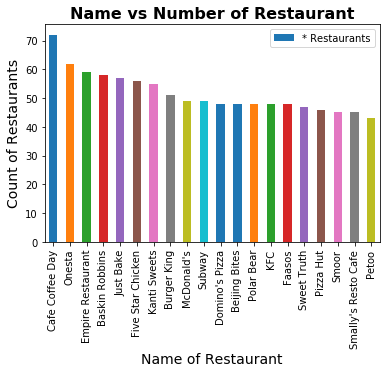

<Figure size 1440x720 with 0 Axes>

In [13]:
ax = df.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])

plt.title('Name vs Number of Restaurant',fontsize =16, weight = 'bold')
plt.xlabel('Name of Restaurant',fontsize=14)
plt.ylabel('Count of Restaurants',fontsize=14)

plt.figure(figsize = (20,10))

Cafe Coffee Day has more number of Restaurents

In [14]:
df.online_order.value_counts() # Online orders

Yes    21730
No     11656
Name: online_order, dtype: int64

Text(0.5, 0, 'online orders')

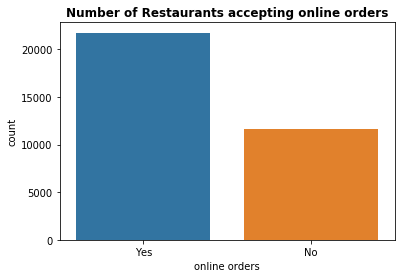

In [15]:
ax= sns.countplot(df['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

In [16]:
df['book_table'].value_counts() # options for book a table

No     28362
Yes     5024
Name: book_table, dtype: int64

Text(0, 0.5, 'No of restaurants')

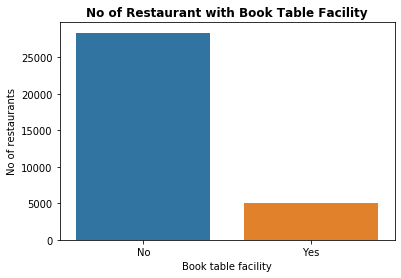

In [17]:
sns.countplot(df['book_table'])
plt.title("No of Restaurant with Book Table Facility", weight = 'bold')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')

In [18]:
df['location'].value_counts()[:10]

BTM                      3139
Koramangala 5th Block    1859
HSR                      1603
Indiranagar              1460
JP Nagar                 1393
Jayanagar                1311
Whitefield               1262
Marathahalli             1162
Bannerghatta Road        1024
Koramangala 6th Block     870
Name: location, dtype: int64

Text(0.5, 1.0, 'Location vs Count')

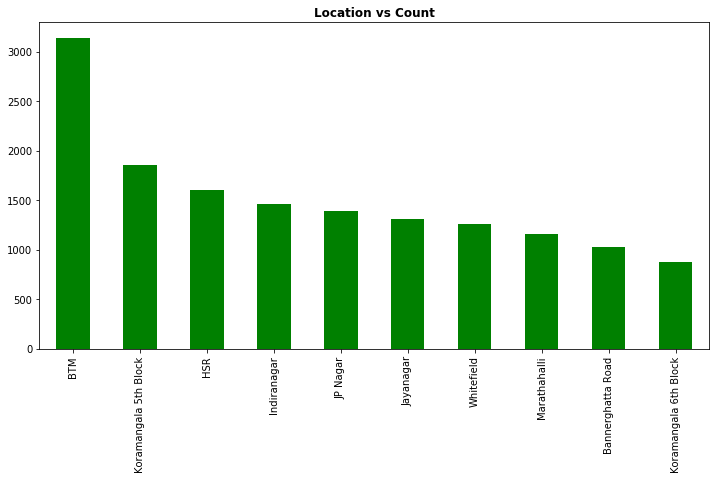

In [19]:
#location v/s count bar plot
plt.figure(figsize = (12,6))
df['location'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

Text(0.5, 1.0, 'Location')

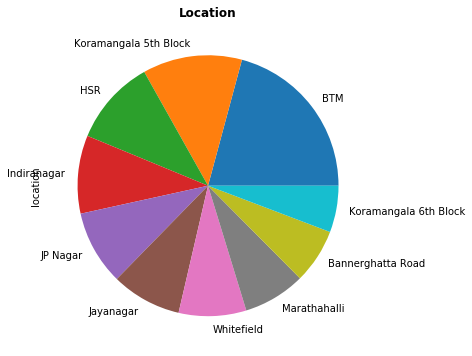

In [20]:
#location v/s count pie graph
plt.figure(figsize=(12,6)) 
df['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

In [21]:
df['location'].nunique() # unique places in Bangalore

91

In [22]:
df['rest_type'].value_counts().head(10) # Restaurent Type

Quick Bites           11178
Casual Dining          7782
Cafe                   2697
Dessert Parlor         1488
Delivery               1355
Takeaway, Delivery     1044
Casual Dining, Bar      870
Bakery                  582
Bar                     523
Beverage Shop           498
Name: rest_type, dtype: int64

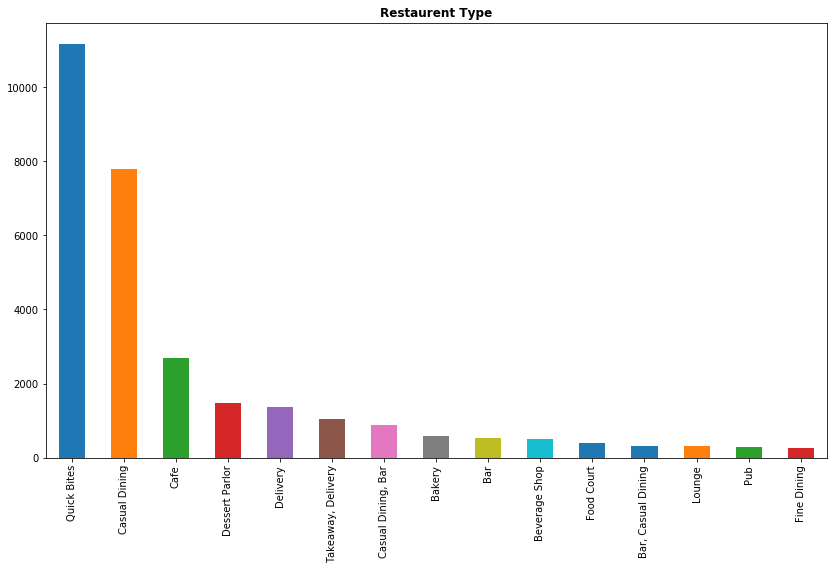

In [23]:
plt.figure(figsize = (14,8))
df.rest_type.value_counts()[:15].plot(kind = 'bar')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

In [24]:
df['average_cost'].value_counts()[:20] # average cost for two people

400      4249
300      4220
500      3285
600      2574
200      2554
250      1677
800      1658
700      1468
1,000    1208
350      1080
150      1072
450      1000
1,200     773
1,500     736
650       613
750       598
550       575
100       530
900       526
1,300     411
Name: average_cost, dtype: int64

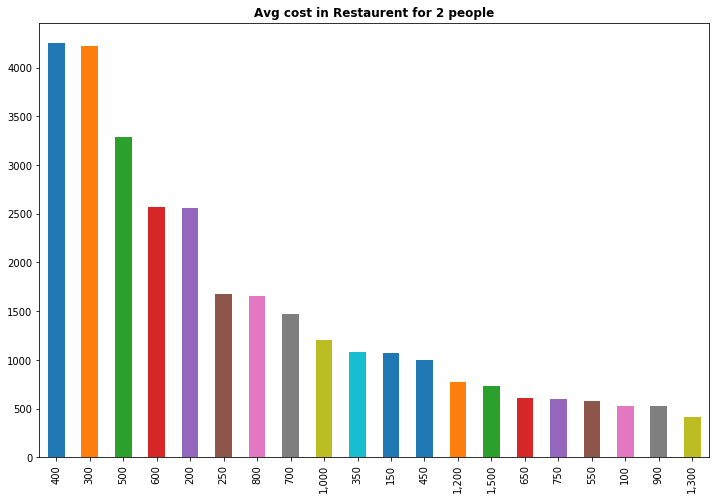

In [25]:
plt.figure(figsize = (12,8))
df['average_cost'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

In [26]:
#ratings
df['rates'] = df['rates'].replace('NEW',np.NaN)
df['rates'] = df['rates'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)

In [27]:
df['rates'] = df.loc[:,'rates'].replace('[ ]','',regex = True)
df['rates'] = df['rates'].astype(str)
df['rates'] = df['rates'].apply(lambda r: r.replace('/5',''))
df['rates'] = df['rates'].apply(lambda r: float(r))

3.906723321858919


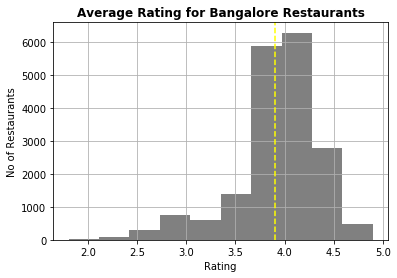

In [28]:
df.rates.hist(color='grey')
plt.axvline(x= df.rates.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(df.rates.mean())

Text(0.5, 1.0, 'rate vs oline order')

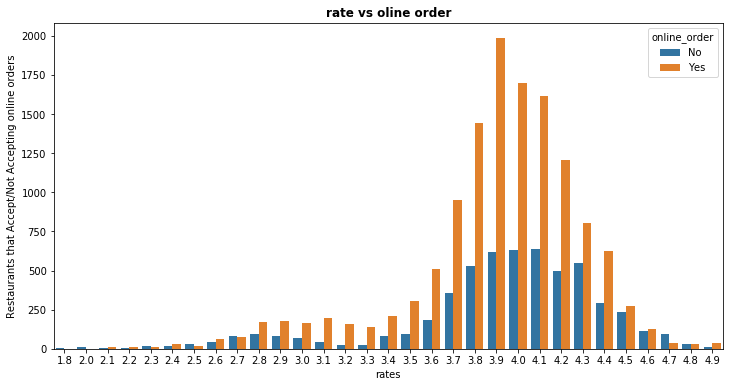

In [29]:
#rates v/s online
plt.figure(figsize = (12,6))
sns.countplot(x=df['rates'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

In [30]:
#lets delete the nulll values
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [31]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

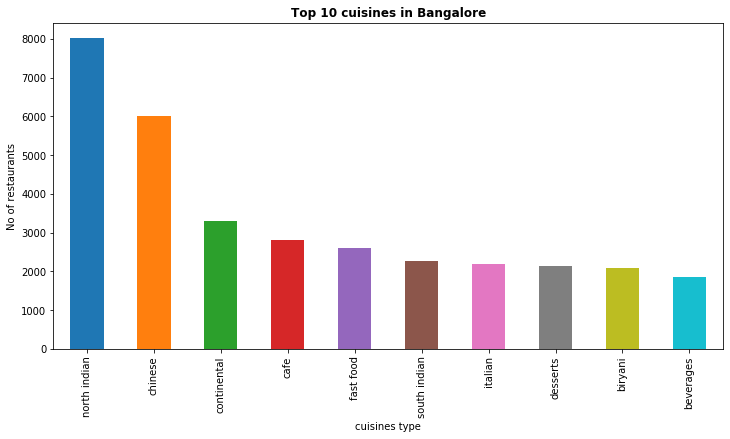

In [32]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

North indian is most liked cuisine in bangalore

# model building

In [33]:
df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)

test_df['online_order']= pd.get_dummies(test_df.online_order, drop_first=True)
test_df['book_table']= pd.get_dummies(test_df.book_table, drop_first=True)

df

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),rates
1,The Boozy Griffin,0,1,5015,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,4.6
3,Sriracha,0,0,699,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,4.3
7,Chez Nous - Novotel,0,1,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian","2,500","[('Rated 5.0', 'RATED\n I will visit there la...",[],Dine-out,3.9
8,Maxpresso,0,0,324,Koramangala 7th Block,Cafe,"Burgers, Coffee, Waffles, Mocktails, Pasta, Br...","Cafe, American, Italian, Beverages",700,"[('Rated 4.0', 'RATED\n A pretty cafe in the ...",[],Delivery,4.1
9,Hyderabadi Biryani Hub,1,0,218,BTM,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600,"[('Rated 3.0', 'RATED\n My friend ordered fri...",[],Delivery,3.6
11,Foody's,1,0,169,Shanti Nagar,Quick Bites,"Coffee, Paratha, Chaat, Masala Dosa, Dahipuri,...","North Indian, South Indian",250,"[('Rated 4.0', 'RATED\n Superb Coffee and Foo...",[],Delivery,3.8
21,Zee5 Loft,1,0,360,Koramangala 6th Block,Cafe,"Tomato Soup, Brownie Shake, Pizza, Salad, Frie...","Cafe, North Indian, Pizza, Sandwich, Salad",500,"[('Rated 5.0', 'RATED\n Good ambiamce, food, ...","['Paneer Makhanwala Combo', 'Mushroom Paneer S...",Cafes,4.4
22,Brewz Coffee,1,0,61,BTM,Cafe,"Coffee, Sandwiches, Cappuccino",Cafe,650,"[('Rated 4.0', ""RATED\n Had been to Brewz Cof...",[],Cafes,3.0
23,Atithi,1,1,224,HSR,Casual Dining,"Vegetable Biryani, Jalebi, Paneer Curry, Tando...","North Indian, Chinese, Street Food",800,"[('Rated 5.0', 'RATED\n Nice place.. Really l...",[],Dine-out,3.9
24,Venus Biryani,1,0,149,Domlur,Quick Bites,Dum Biryani,"Biryani, Chinese",200,"[('Rated 1.0', 'RATED\n Poor Packing. Food wa...","['Chicken Chettinadu Fry', 'Ambur Chicken Keba...",Dine-out,3.1


In [34]:
df.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)
test_df.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [35]:
df['rest_type'] = df['rest_type'].str.replace(',' , '') 
df['rest_type'] = df['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

test_df['rest_type'] = test_df['rest_type'].str.replace(',' , '') 
test_df['rest_type'] = test_df['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

df['rest_type'].value_counts().head()

Casual Dining        5912
Bites Quick          4203
Cafe                 1874
Bar Casual Dining    1053
Dessert Parlor        860
Name: rest_type, dtype: int64

In [36]:
df['cuisines'] = df['cuisines'].str.replace(',' , '') 
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

test_df['cuisines'] = test_df['cuisines'].str.replace(',' , '') 
test_df['cuisines'] = test_df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

df['cuisines'].value_counts().head()

Indian North                         933
Chinese Indian North                 690
Chinese Indian Indian North South    364
Indian South                         294
Cream Desserts Ice                   266
Name: cuisines, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
df['location'] = T.fit_transform(df['location'])
df['rest_type'] = T.fit_transform(df['rest_type'])
df['cuisines'] = T.fit_transform(df['cuisines'])

test_df['location'] = T.fit_transform(test_df['location'])
test_df['rest_type'] = T.fit_transform(test_df['rest_type'])
test_df['cuisines'] = T.fit_transform(test_df['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

In [38]:
df["average_cost"] = df["average_cost"].str.replace(',' , '') 
test_df["average_cost"] = test_df["average_cost"].str.replace(',' , '') 

In [39]:
df["average_cost"] = df["average_cost"].astype('float')
test_df["average_cost"] = test_df["average_cost"].astype('float')

In [40]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
1,The Boozy Griffin,0,1,5015,42,32,991,1800.0,4.6
3,Sriracha,0,0,699,48,29,267,1500.0,4.3
7,Chez Nous - Novotel,0,1,125,53,45,1078,2500.0,3.9
8,Maxpresso,0,0,324,44,21,45,700.0,4.1
9,Hyderabadi Biryani Hub,1,0,218,0,29,608,600.0,3.6


In [41]:
test_df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
0,Shrawan Restaurant,1,0,0,82,18,418,300.0,NaN
1,Copacabana Pub,0,0,0,76,25,458,1500.0,NaN
2,FixMyNutrition,0,0,0,64,29,90,500.0,NaN
3,Santo's,1,0,0,52,27,570,500.0,NaN
4,Kitchen Stories,0,0,0,78,44,157,400.0,NaN


In [42]:
x = df.drop(['rates','name'],axis = 1)
test_x = test_df.drop(['rates','name'],axis = 1)

In [43]:
y = df['rates']

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 100)

In [45]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler

num_values1=df.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(df[num_values1])
df[num_values1]=scaler.transform(df[num_values1])

num_values1=test_df.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(test_df[num_values1])
test_df[num_values1]=scaler.transform(test_df[num_values1])

In [46]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
1,The Boozy Griffin,0,1,3.945124,0.281036,0.737044,0.670972,2.011102,1.626822
3,Sriracha,0,0,0.083064,0.539061,0.437607,-1.381618,1.435326,0.922851
7,Chez Nous - Novotel,0,1,-0.430565,0.754083,2.034602,0.917623,3.354578,-0.015777
8,Maxpresso,0,0,-0.252495,0.367044,-0.360890,-2.011004,-0.100075,0.453537
9,Hyderabadi Biryani Hub,1,0,-0.347347,-1.525143,0.437607,-0.414859,-0.292000,-0.719748


In [47]:
test_df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
0,Shrawan Restaurant,1,0,-0.039789,1.858386,-0.294340,0.277870,-0.263189,NaN
1,Copacabana Pub,0,0,-0.039789,1.630521,0.601747,0.515281,5.226539,NaN
2,FixMyNutrition,0,0,-0.039789,1.174791,1.113797,-1.668899,0.651766,NaN
3,Santo's,1,0,-0.039789,0.719061,0.857772,1.180031,0.651766,NaN
4,Kitchen Stories,0,0,-0.039789,1.706476,3.033983,-1.271236,0.194289,NaN


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(lm.intercept_)

3.7107717669676674


In [52]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
online_order,0.045804
book_table,0.195547
votes,0.000108
location,0.001115
rest_type,-0.000696
cuisines,-0.000049
average_cost,0.000083


In [53]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [54]:
y_pred

array([3.87665664, 3.78885734, 3.84026696, ..., 3.98646675, 3.74027163,
       3.78343459])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [56]:
from math import sqrt
rmse = sqrt(mse)

In [57]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.14227818335988424
Root_Mean_Squared_Error : 0.3771978040231468
r_square_value : 0.2131505233134121


In [58]:
lm.score(X_test, y_test)*100

21.31505233134121

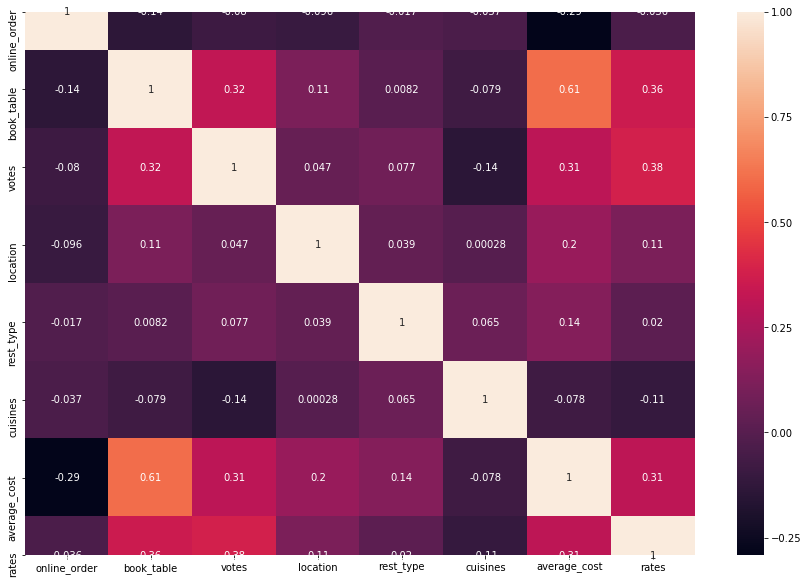

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

In [60]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8717406367937783

In [61]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8624157204610644

In [62]:
test_df.describe()

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
count,7955.000000,7955.000000,7.955000e+03,7.955000e+03,7.955000e+03,7.955000e+03,7.896000e+03
mean,0.325456,0.014833,-5.212448e-16,-2.032594e-16,3.321388e-16,1.197450e-16,1.409010e-16
std,0.468574,0.120894,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,0.000000,0.000000,-3.978931e-02,-1.255768e+00,-2.598564e+00,-2.203074e+00,-1.406882e+00
25%,0.000000,0.000000,-3.978931e-02,-9.519482e-01,-2.943401e-01,-6.955147e-01,-7.206659e-01
50%,0.000000,0.000000,-3.978931e-02,-1.923986e-01,-2.943401e-01,1.769704e-01,-2.631885e-01
75%,1.000000,0.000000,-3.978931e-02,7.190610e-01,8.577718e-01,9.010736e-01,1.942888e-01
max,1.000000,1.000000,4.597737e+01,1.972318e+00,3.033983e+00,1.423378e+00,7.971403e+00


In [68]:
test_x1 = test_df.drop(['rates', 'name'],axis=1)

In [70]:
test_x.fillna(X_train.mean(), inplace=True)

prediction = RForest.predict(test_x)
prediction

array([3.60017694, 3.73781716, 3.41003317, ..., 3.61269935, 3.76101443,
       3.66941294])